# Exploratory Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

## Overall Dataset

In [40]:
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/filtered_protein_data.csv')

# Create a copy with only selected columns
selected_columns = ['price_per_100g', 'price_per_100g_protein', 
                   'brand', 'protein_source', 'protein_type', 'protein_complexity', 
                   'organic_true', 'gmofree_true']

df = df[selected_columns].copy()

# Key Insights On overall dataset
print("\n\n7. KEY INSIGHTS ON THE OVERALL DATASET")
print("-" * 40)

categorical_cols = ['brand', 'protein_source', 'protein_type', 'protein_complexity']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        value_counts = df[col].value_counts()
        print(f"  Unique values: {len(value_counts)}")
        print(f"  Most common: {value_counts.index[0]} ({value_counts.iloc[0]} products)")
        if len(value_counts) <= 10:
            print("  Distribution:")
            for idx, (value, count) in enumerate(value_counts.head(10).items()):
                print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")

print("\n")                
                
boolean_cols = ['organic_true', 'gmofree_true']
for col in boolean_cols:
    if col in df.columns:
        true_count = df[col].sum()
        false_count = len(df) - true_count
        print(f"{col}: True: {true_count} ({true_count/len(df)*100:.1f}%), False: {false_count} ({false_count/len(df)*100:.1f}%)")

print("\n")   
                
print(f"• Average price: ${df['price_per_100g'].mean():.2f} per 100g")
print(f"• Average price per 100g protein: ${df['price_per_100g_protein'].mean():.2f}")
print(f"• Most expensive product: ${df['price_per_100g'].max():.2f}")
print(f"• Cheapest product: ${df['price_per_100g'].min():.2f}")
print(f"• Highest price per 100g protein: ${df['price_per_100g_protein'].max():.2f}")
print(f"• Most common brand: {df['brand'].mode().iloc[0]}")
if 'protein_source' in df.columns:
    print(f"• Most common protein source: {df['protein_source'].mode().iloc[0]}")

# Correlation insights
print(f"• Price per 100g - Price per 100g protein correlation: {df['price_per_100g'].corr(df['price_per_100g_protein']):.3f}")



7. KEY INSIGHTS ON THE OVERALL DATASET
----------------------------------------

BRAND:
  Unique values: 30
  Most common: Bulk (22 products)

PROTEIN_SOURCE:
  Unique values: 4
  Most common: Animal-based (64 products)
  Distribution:
    Animal-based: 64 (62.1%)
    Plant-based: 34 (33.0%)
    Mixed: 3 (2.9%)
    Unknown: 2 (1.9%)

PROTEIN_TYPE:
  Unique values: 19
  Most common: Whey (43 products)

PROTEIN_COMPLEXITY:
  Unique values: 3
  Most common: Single source (69 products)
  Distribution:
    Single source: 69 (67.0%)
    Blend: 32 (31.1%)
    Unknown: 2 (1.9%)


organic_true: True: 19 (18.4%), False: 84 (81.6%)
gmofree_true: True: 10 (9.7%), False: 93 (90.3%)


• Average price: $4.55 per 100g
• Average price per 100g protein: $6.35
• Most expensive product: $27.60
• Cheapest product: $1.25
• Highest price per 100g protein: $34.50
• Most common brand: Bulk
• Most common protein source: Animal-based
• Price per 100g - Price per 100g protein correlation: 0.958


## Brand Pricing

=== PROTEIN BRAND PRICING ANALYSIS ===

Dataset shape: (103, 8)
Number of unique brands: 30

1. BRAND PRICING STATISTICS (ALL BRANDS)
All brands sorted by mean price per 100g (highest to lowest):
                           price_per_100g                     \
                                     mean median   std count   
brand                                                          
Form Nutrition                       6.84   6.84   NaN     1   
Om Organic Mushrooms                 6.43   6.43   NaN     1   
JYM Supplement Science               6.26   6.26   NaN     1   
Truvani                              6.09   6.09   NaN     1   
RAW                                  5.96   5.96   NaN     1   
Ambrosia Collective                  5.92   5.92  0.05     2   
SunWarrior                           5.53   5.42  1.57     3   
ProteinWorks                         5.46   5.37  2.19    14   
Natreve                              5.43   5.43   NaN     1   
Bulk                                

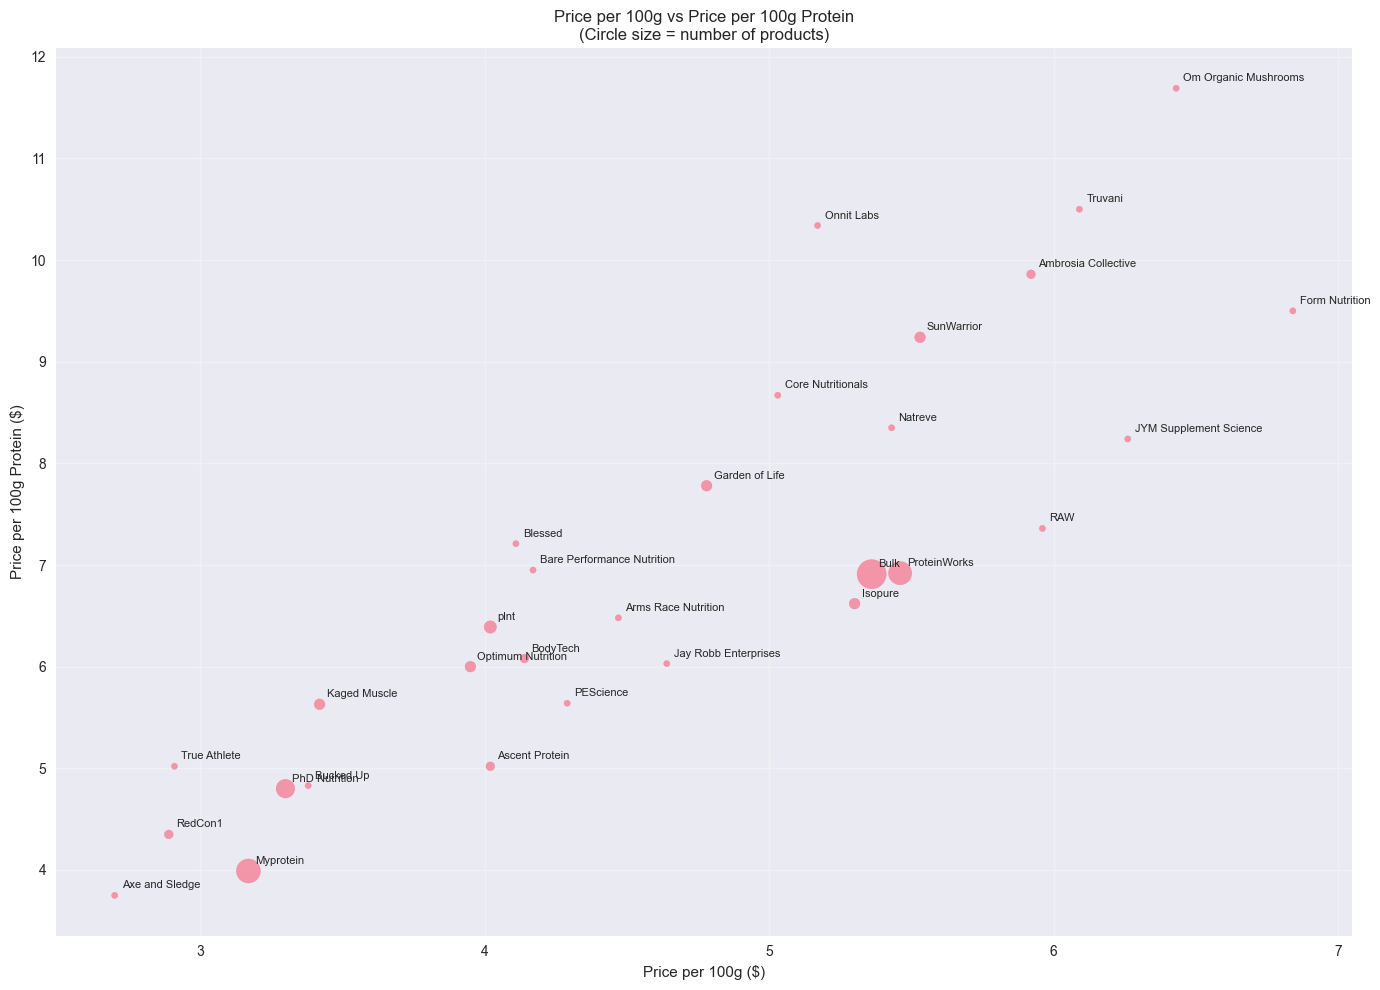


3. KEY INSIGHTS
Correlation between price/100g and price/100g protein: 0.865

Most expensive brand (avg): Form Nutrition ($6.84/100g)
Cheapest brand (avg): Axe and Sledge ($2.70/100g)
Brand with most products: Bulk (22 products)

** ANALYSIS CAVEAT - Sample Size Impact **
• 16 brands have only 1 product (53% of brands)
• 25 brands have ≤3 products (83% of brands)
• Brands with small samples may show unreliable averages and should be interpreted cautiously
• Focus on brands with larger sample sizes (n≥5) for more reliable pricing insights

Overall dataset averages:
  Price per 100g: $4.55
  Price per 100g protein: $6.35


In [43]:
# Set style for better plots
plt.style.use('seaborn')
sns.set_palette("husl")

print("=== PROTEIN BRAND PRICING ANALYSIS ===\n")
print(f"Dataset shape: {df.shape}")
print(f"Number of unique brands: {df['brand'].nunique()}")

# 1. BRAND STATISTICS - ALL BRANDS
print("\n" + "="*50)
print("1. BRAND PRICING STATISTICS (ALL BRANDS)")
print("="*50)

# Calculate statistics for all brands
brand_prices = df.groupby('brand').agg({
    'price_per_100g': ['mean', 'median', 'std', 'count'],
    'price_per_100g_protein': ['mean', 'median', 'std', 'count']
}).round(2)

# Sort by average price per 100g
brand_prices_sorted = brand_prices.sort_values(('price_per_100g', 'mean'), ascending=False)

print("All brands sorted by mean price per 100g (highest to lowest):")
print(brand_prices_sorted)

# 2. SCATTER PLOT VISUALIZATION
print("\n" + "="*30)
print("2. SCATTER PLOT VISUALIZATION")
print("="*30)

# Extract mean prices for plotting
mean_prices = brand_prices_sorted[('price_per_100g', 'mean')]
mean_protein_prices = brand_prices_sorted[('price_per_100g_protein', 'mean')]

plt.figure(figsize=(14, 10))
plt.scatter(mean_prices, mean_protein_prices, 
           s=brand_prices_sorted[('price_per_100g', 'count')] * 20,  # Size by count
           alpha=0.7)

# Add brand labels
for i, brand in enumerate(mean_prices.index):
    plt.annotate(brand, (mean_prices.iloc[i], mean_protein_prices.iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Price per 100g ($)')
plt.ylabel('Price per 100g Protein ($)')
plt.title('Price per 100g vs Price per 100g Protein\n(Circle size = number of products)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. SUMMARY INSIGHTS
print("\n" + "="*30)
print("3. KEY INSIGHTS")
print("="*30)

# Calculate correlation
correlation = mean_prices.corr(mean_protein_prices)
print(f"Correlation between price/100g and price/100g protein: {correlation:.3f}")

# Identify extremes
most_expensive = brand_prices_sorted.index[0]
cheapest = brand_prices_sorted.index[-1]
most_products = brand_prices_sorted.sort_values(('price_per_100g', 'count'), ascending=False).index[0]

print(f"\nMost expensive brand (avg): {most_expensive} (${mean_prices.loc[most_expensive]:.2f}/100g)")
print(f"Cheapest brand (avg): {cheapest} (${mean_prices.loc[cheapest]:.2f}/100g)")
print(f"Brand with most products: {most_products} ({brand_prices_sorted.loc[most_products, ('price_per_100g', 'count')]} products)")

# Sample size analysis caveat
sample_sizes = brand_prices_sorted[('price_per_100g', 'count')]
single_product_brands = (sample_sizes == 1).sum()
small_sample_brands = (sample_sizes <= 3).sum()

print(f"\n** ANALYSIS CAVEAT - Sample Size Impact **")
print(f"• {single_product_brands} brands have only 1 product ({single_product_brands/len(sample_sizes)*100:.0f}% of brands)")
print(f"• {small_sample_brands} brands have ≤3 products ({small_sample_brands/len(sample_sizes)*100:.0f}% of brands)")
print(f"• Brands with small samples may show unreliable averages and should be interpreted cautiously")
print(f"• Focus on brands with larger sample sizes (n≥5) for more reliable pricing insights")

print(f"\nOverall dataset averages:")
print(f"  Price per 100g: ${df['price_per_100g'].mean():.2f}")
print(f"  Price per 100g protein: ${df['price_per_100g_protein'].mean():.2f}")

## Protein Source Pricing

=== PROTEIN SOURCE PRICING ANALYSIS ===

Dataset shape: (103, 8)
Unique protein sources: ['Plant-based' 'Unknown' 'Animal-based' 'Mixed']

1. PROTEIN SOURCE PRICING STATISTICS
All protein sources sorted by mean price per 100g (highest to lowest):
               price_per_100g                    price_per_100g_protein  \
                         mean median   std count                   mean   
protein_source                                                            
Animal-based             4.87   4.28  3.33    64                   6.48   
Mixed                    4.31   3.01  2.46     3                   6.21   
Plant-based              4.02   3.87  1.62    34                   6.22   
Unknown                  3.60   3.60  3.33     2                   4.78   

                                   
               median   std count  
protein_source                     
Animal-based     5.84  4.09    64  
Mixed            4.36  3.22     3  
Plant-based      5.83  3.08    34  
Unknown    

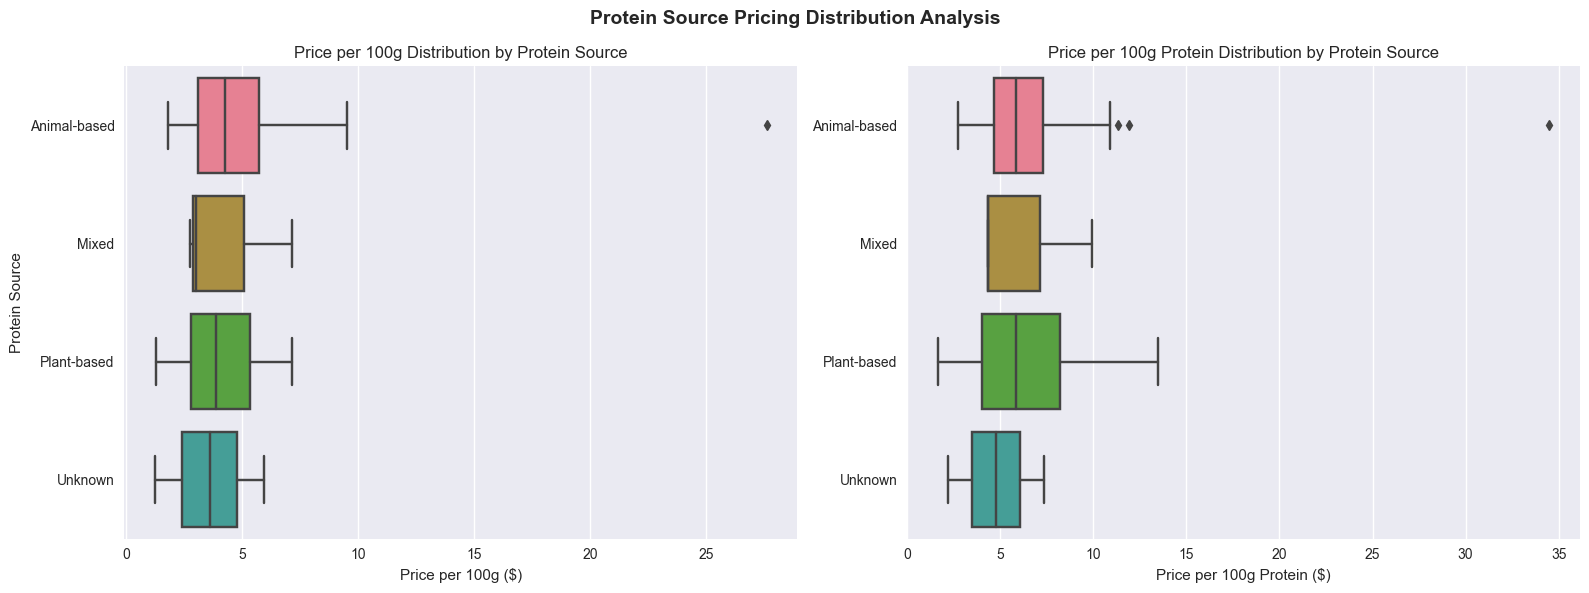

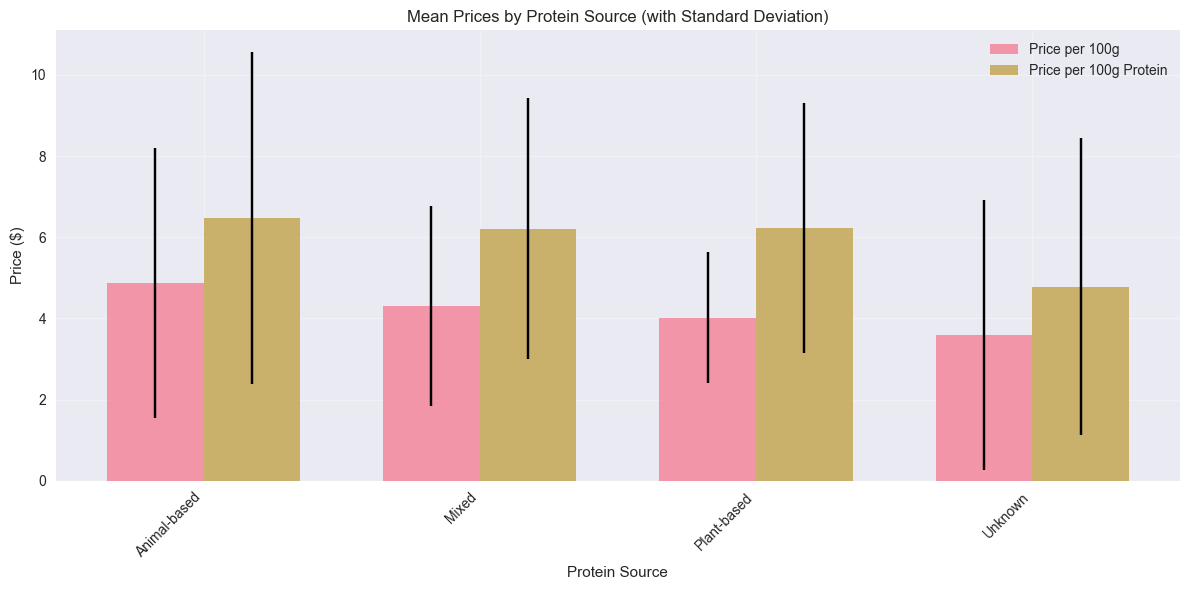


3. KEY INSIGHTS
Most expensive protein source (avg): Animal-based ($4.87/100g)
Cheapest protein source (avg): Unknown ($3.60/100g)
Most common protein source: Animal-based (64 products)
Price range across sources: $1.27 ($3.60 - $4.87)

** ANALYSIS CAVEAT - Sample Size Impact **
• 2 protein sources have ≤5 products (50% of sources)
• Sample sizes by source:
  - Animal-based: 64 products ✓ Adequate sample
  - Mixed: 3 products ⚠️  Small sample
  - Plant-based: 34 products ✓ Adequate sample
  - Unknown: 2 products ⚠️  Small sample
• Sources with small samples should be interpreted cautiously
• Focus on sources with larger samples for reliable pricing insights

** PROTEIN VALUE INSIGHTS **
• Best protein value (lowest protein price ratio): Unknown
• Worst protein value (highest protein price ratio): Plant-based

Overall dataset averages:
  Price per 100g: $4.55
  Price per 100g protein: $6.35


In [30]:
# Set style for better plots
plt.style.use('seaborn')
sns.set_palette("husl")

print("=== PROTEIN SOURCE PRICING ANALYSIS ===\n")
print(f"Dataset shape: {df.shape}")
print(f"Unique protein sources: {df['protein_source'].unique()}")

# 1. PROTEIN SOURCE STATISTICS
print("\n" + "="*50)
print("1. PROTEIN SOURCE PRICING STATISTICS")
print("="*50)

# Calculate statistics for all protein sources
source_prices = df.groupby('protein_source').agg({
    'price_per_100g': ['mean', 'median', 'std', 'count'],
    'price_per_100g_protein': ['mean', 'median', 'std', 'count']
}).round(2)

# Sort by average price per 100g
source_prices_sorted = source_prices.sort_values(('price_per_100g', 'mean'), ascending=False)

print("All protein sources sorted by mean price per 100g (highest to lowest):")
print(source_prices_sorted)

# 2. VISUALIZATION
print("\n" + "="*30)
print("2. VISUALIZATION")
print("="*30)

# Create figure with subplots - box plots are most insightful for comparing distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Protein Source Pricing Distribution Analysis', fontsize=14, fontweight='bold')

# Box plot 1: Price per 100g by protein source
axes[0].set_title('Price per 100g Distribution by Protein Source')
df_plot = df.copy()
df_plot = df_plot.sort_values('price_per_100g', ascending=False)  # Order by median for better readability
sns.boxplot(data=df_plot, y='protein_source', x='price_per_100g', ax=axes[0])
axes[0].set_xlabel('Price per 100g ($)')
axes[0].set_ylabel('Protein Source')

# Box plot 2: Price per 100g protein by source
axes[1].set_title('Price per 100g Protein Distribution by Protein Source')
sns.boxplot(data=df_plot, y='protein_source', x='price_per_100g_protein', ax=axes[1])
axes[1].set_xlabel('Price per 100g Protein ($)')
axes[1].set_ylabel('')  # Remove y-label to avoid duplication

plt.tight_layout()
plt.show()

# Additional visualization: Mean comparison with error bars
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Extract means and stds for error bars
means_100g = source_prices_sorted[('price_per_100g', 'mean')]
stds_100g = source_prices_sorted[('price_per_100g', 'std')]
means_protein = source_prices_sorted[('price_per_100g_protein', 'mean')]
stds_protein = source_prices_sorted[('price_per_100g_protein', 'std')]

x_pos = np.arange(len(means_100g))
width = 0.35

# Create bar plot with error bars
bars1 = ax.bar(x_pos - width/2, means_100g, width, yerr=stds_100g, 
               label='Price per 100g', alpha=0.7, capsize=5)
bars2 = ax.bar(x_pos + width/2, means_protein, width, yerr=stds_protein,
               label='Price per 100g Protein', alpha=0.7, capsize=5)

ax.set_xlabel('Protein Source')
ax.set_ylabel('Price ($)')
ax.set_title('Mean Prices by Protein Source (with Standard Deviation)')
ax.set_xticks(x_pos)
ax.set_xticklabels(means_100g.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. KEY INSIGHTS
print("\n" + "="*30)
print("3. KEY INSIGHTS")
print("="*30)

# Calculate key statistics
cheapest_source = source_prices_sorted.index[-1]
most_expensive_source = source_prices_sorted.index[0]
most_common_source = source_prices_sorted.sort_values(('price_per_100g', 'count'), ascending=False).index[0]

print(f"Most expensive protein source (avg): {most_expensive_source} (${means_100g.loc[most_expensive_source]:.2f}/100g)")
print(f"Cheapest protein source (avg): {cheapest_source} (${means_100g.loc[cheapest_source]:.2f}/100g)")
print(f"Most common protein source: {most_common_source} ({source_prices_sorted.loc[most_common_source, ('price_per_100g', 'count')]} products)")

# Price difference analysis
price_range = means_100g.max() - means_100g.min()
print(f"Price range across sources: ${price_range:.2f} (${means_100g.min():.2f} - ${means_100g.max():.2f})")

# Sample size analysis and caveats
sample_sizes = source_prices_sorted[('price_per_100g', 'count')]
small_sample_sources = (sample_sizes <= 5).sum()

print(f"\n** ANALYSIS CAVEAT - Sample Size Impact **")
print(f"• {small_sample_sources} protein sources have ≤5 products ({small_sample_sources/len(sample_sizes)*100:.0f}% of sources)")

# Show sample sizes for context
print(f"• Sample sizes by source:")
for source in sample_sizes.index:
    count = sample_sizes.loc[source]
    reliability = "⚠️  Small sample" if count <= 5 else "✓ Adequate sample"
    print(f"  - {source}: {count} products {reliability}")

print(f"• Sources with small samples should be interpreted cautiously")
print(f"• Focus on sources with larger samples for reliable pricing insights")

# Additional insight on protein efficiency
print(f"\n** PROTEIN VALUE INSIGHTS **")
efficiency_ratio = means_protein / means_100g
best_efficiency = efficiency_ratio.idxmin()
worst_efficiency = efficiency_ratio.idxmax()
print(f"• Best protein value (lowest protein price ratio): {best_efficiency}")
print(f"• Worst protein value (highest protein price ratio): {worst_efficiency}")

print(f"\nOverall dataset averages:")
print(f"  Price per 100g: ${df['price_per_100g'].mean():.2f}")
print(f"  Price per 100g protein: ${df['price_per_100g_protein'].mean():.2f}")

## Organic/ GMO-free Pricing


Organic vs Regular prices:
  Organic mean: €5.25
  Regular mean: €4.46
  Price difference: €0.80
  Percentage premium: 17.9%
  T-test p-value: 0.2955
  Significant difference: No

GMO-Free vs Regular prices:
  GMO-Free mean: €3.78
  Regular mean: €4.46
  Price difference: €-0.68
  Percentage difference: -15.2%
  T-test p-value: 0.5121
  Significant difference: No

CREATING VISUALIZATIONS


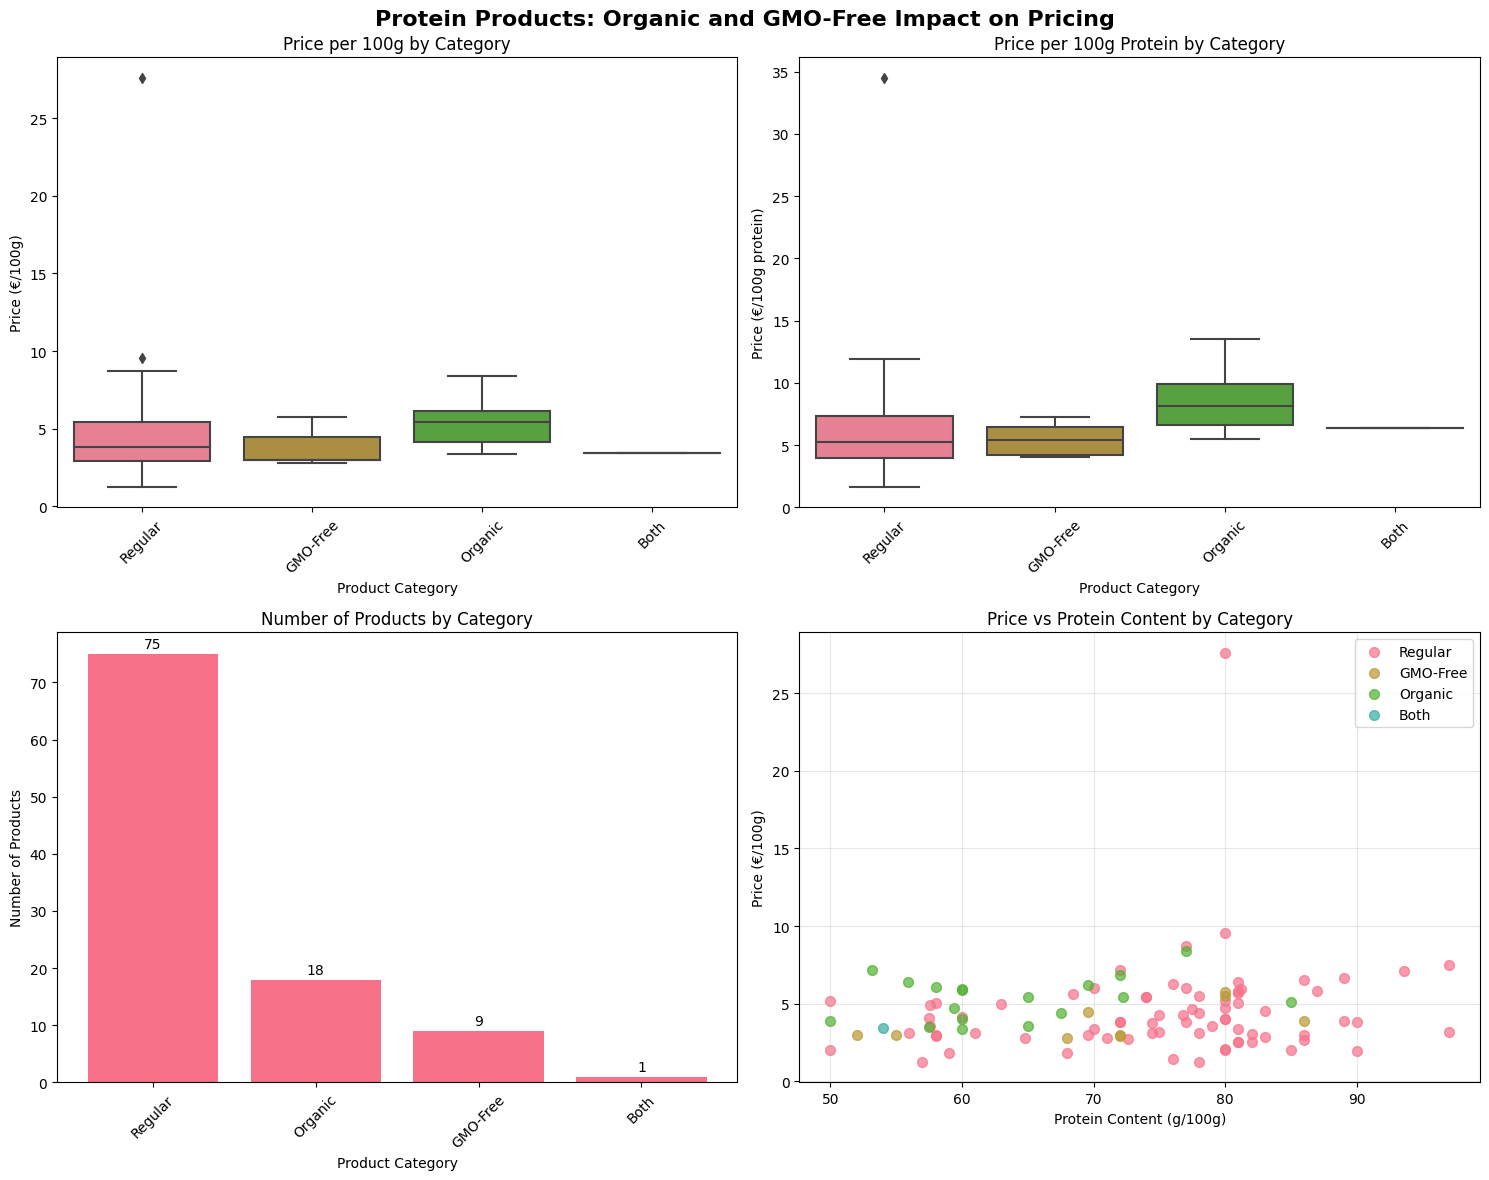


ENHANCED DATASET SAMPLE

New columns added:
- organic_true: Boolean indicating if product is organic
- gmofree_true: Boolean indicating if product is GMO-free
- category: Categorical label for analysis

Sample of enhanced dataset:
            product_name  price_per_100g  price_per_100g_protein  \
0    Brown Rice Protein             1.28                    1.64   
1     Vegan Pea Protein             1.45                    1.91   
2     Impact Soy Protein            1.95                    2.17   
3  Protein Hot Chocolate            1.25                    2.19   
4   Soya Protein Isolate            2.00                    2.35   
5     Brown Rice Protein            2.00                    2.50   
6     Impact Pea Protein            2.08                    2.60   
7     Diet Whey Protein             1.85                    2.72   
8          Smart Protein            1.80                    3.05   
9     Vegan Soy Protein             2.66                    3.09   

   organic_true  gm

In [23]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('../protein_data_enhanced.csv')

# T-tests comparing organic vs regular and gmo-free vs regular
organic_prices = df[df['organic_true']]['price_per_100g'].dropna()
regular_prices = df[~df['organic_true'] & ~df['gmofree_true']]['price_per_100g'].dropna()
gmo_free_prices = df[df['gmofree_true']]['price_per_100g'].dropna()

# Organic vs Regular
if len(organic_prices) > 0 and len(regular_prices) > 0:
    t_stat_org, p_val_org = stats.ttest_ind(organic_prices, regular_prices)
    print(f"\nOrganic vs Regular prices:")
    print(f"  Organic mean: €{organic_prices.mean():.2f}")
    print(f"  Regular mean: €{regular_prices.mean():.2f}")
    print(f"  Price difference: €{organic_prices.mean() - regular_prices.mean():.2f}")
    print(f"  Percentage premium: {((organic_prices.mean() / regular_prices.mean()) - 1) * 100:.1f}%")
    print(f"  T-test p-value: {p_val_org:.4f}")
    print(f"  Significant difference: {'Yes' if p_val_org < 0.05 else 'No'}")

# GMO-Free vs Regular
if len(gmo_free_prices) > 0 and len(regular_prices) > 0:
    t_stat_gmo, p_val_gmo = stats.ttest_ind(gmo_free_prices, regular_prices)
    print(f"\nGMO-Free vs Regular prices:")
    print(f"  GMO-Free mean: €{gmo_free_prices.mean():.2f}")
    print(f"  Regular mean: €{regular_prices.mean():.2f}")
    print(f"  Price difference: €{gmo_free_prices.mean() - regular_prices.mean():.2f}")
    print(f"  Percentage difference: {((gmo_free_prices.mean() / regular_prices.mean()) - 1) * 100:.1f}%")
    print(f"  T-test p-value: {p_val_gmo:.4f}")
    print(f"  Significant difference: {'Yes' if p_val_gmo < 0.05 else 'No'}")

# Create visualizations
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Protein Products: Organic and GMO-Free Impact on Pricing', fontsize=16, fontweight='bold')

# 1. Box plot of prices by category
ax1 = axes[0, 0]
df_plot = df[df['price_per_100g'].notna()]
sns.boxplot(data=df_plot, x='category', y='price_per_100g', ax=ax1)
ax1.set_title('Price per 100g by Category')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Price (€/100g)')
ax1.tick_params(axis='x', rotation=45)

# 2. Box plot of protein prices by category
ax2 = axes[0, 1]
df_plot_protein = df[df['price_per_100g_protein'].notna()]
sns.boxplot(data=df_plot_protein, x='category', y='price_per_100g_protein', ax=ax2)
ax2.set_title('Price per 100g Protein by Category')
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Price (€/100g protein)')
ax2.tick_params(axis='x', rotation=45)

# 3. Count of products by category
ax3 = axes[1, 0]
category_counts = df['category'].value_counts()
bars = ax3.bar(category_counts.index, category_counts.values)
ax3.set_title('Number of Products by Category')
ax3.set_xlabel('Product Category')
ax3.set_ylabel('Number of Products')
ax3.tick_params(axis='x', rotation=45)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

# 4. Scatter plot: Price vs Protein content, colored by category
ax4 = axes[1, 1]
for category in df['category'].unique():
    cat_data = df[df['category'] == category]
    ax4.scatter(cat_data['protein'], cat_data['price_per_100g'], 
               label=category, alpha=0.7, s=50)

ax4.set_title('Price vs Protein Content by Category')
ax4.set_xlabel('Protein Content (g/100g)')
ax4.set_ylabel('Price (€/100g)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display sample of enhanced dataset
print("\n" + "="*60)
print("ENHANCED DATASET SAMPLE")
print("="*60)

print("\nNew columns added:")
print("- organic_true: Boolean indicating if product is organic")
print("- gmofree_true: Boolean indicating if product is GMO-free")
print("- category: Categorical label for analysis")

print(f"\nSample of enhanced dataset:")
sample_cols = ['product_name', 'price_per_100g', 'price_per_100g_protein', 
               'organic_true', 'gmofree_true', 'category']
print(df[sample_cols].head(10))

# Key findings summary
print("\n" + "="*60)
print("KEY FINDINGS SUMMARY")
print("="*60)

print("\n🔍 MAIN FINDINGS:")

if len(organic_prices) > 0 and len(regular_prices) > 0:
    org_premium = ((organic_prices.mean() / regular_prices.mean()) - 1) * 100
    print(f"• Organic products carry a {org_premium:.1f}% price premium")
    print(f"  (€{organic_prices.mean():.2f} vs €{regular_prices.mean():.2f} per 100g)")

if len(gmo_free_prices) > 0 and len(regular_prices) > 0:
    gmo_diff = ((gmo_free_prices.mean() / regular_prices.mean()) - 1) * 100
    if gmo_diff > 0:
        print(f"• GMO-free products carry a {gmo_diff:.1f}% price premium")
    else:
        print(f"• GMO-free products are {abs(gmo_diff):.1f}% cheaper than regular products")
    print(f"  (€{gmo_free_prices.mean():.2f} vs €{regular_prices.mean():.2f} per 100g)")



=== ORGANIC/GMO-FREE PRODUCT PRICING ANALYSIS ===

Dataset shape: (103, 21)
Unique categories: ['Regular' 'GMO-Free' 'Organic' 'Both']
Category distribution:
Regular     75
Organic     18
GMO-Free     9
Both         1
Name: category, dtype: int64

1. PRICING STATISTICS BY CATEGORY
All categories sorted by mean price per 100g (highest to lowest):
         price_per_100g                    price_per_100g_protein         \
                   mean median   std count                   mean median   
category                                                                   
Organic            5.36   5.42  1.41    18                   8.50   8.16   
Regular            4.46   3.81  3.22    75                   5.95   5.28   
GMO-Free           3.82   3.02  1.17     9                   5.40   5.44   
Both               3.45   3.45   NaN     1                   6.39   6.39   

                      
           std count  
category              
Organic   2.27    18  
Regular   4.03    75  
GMO-

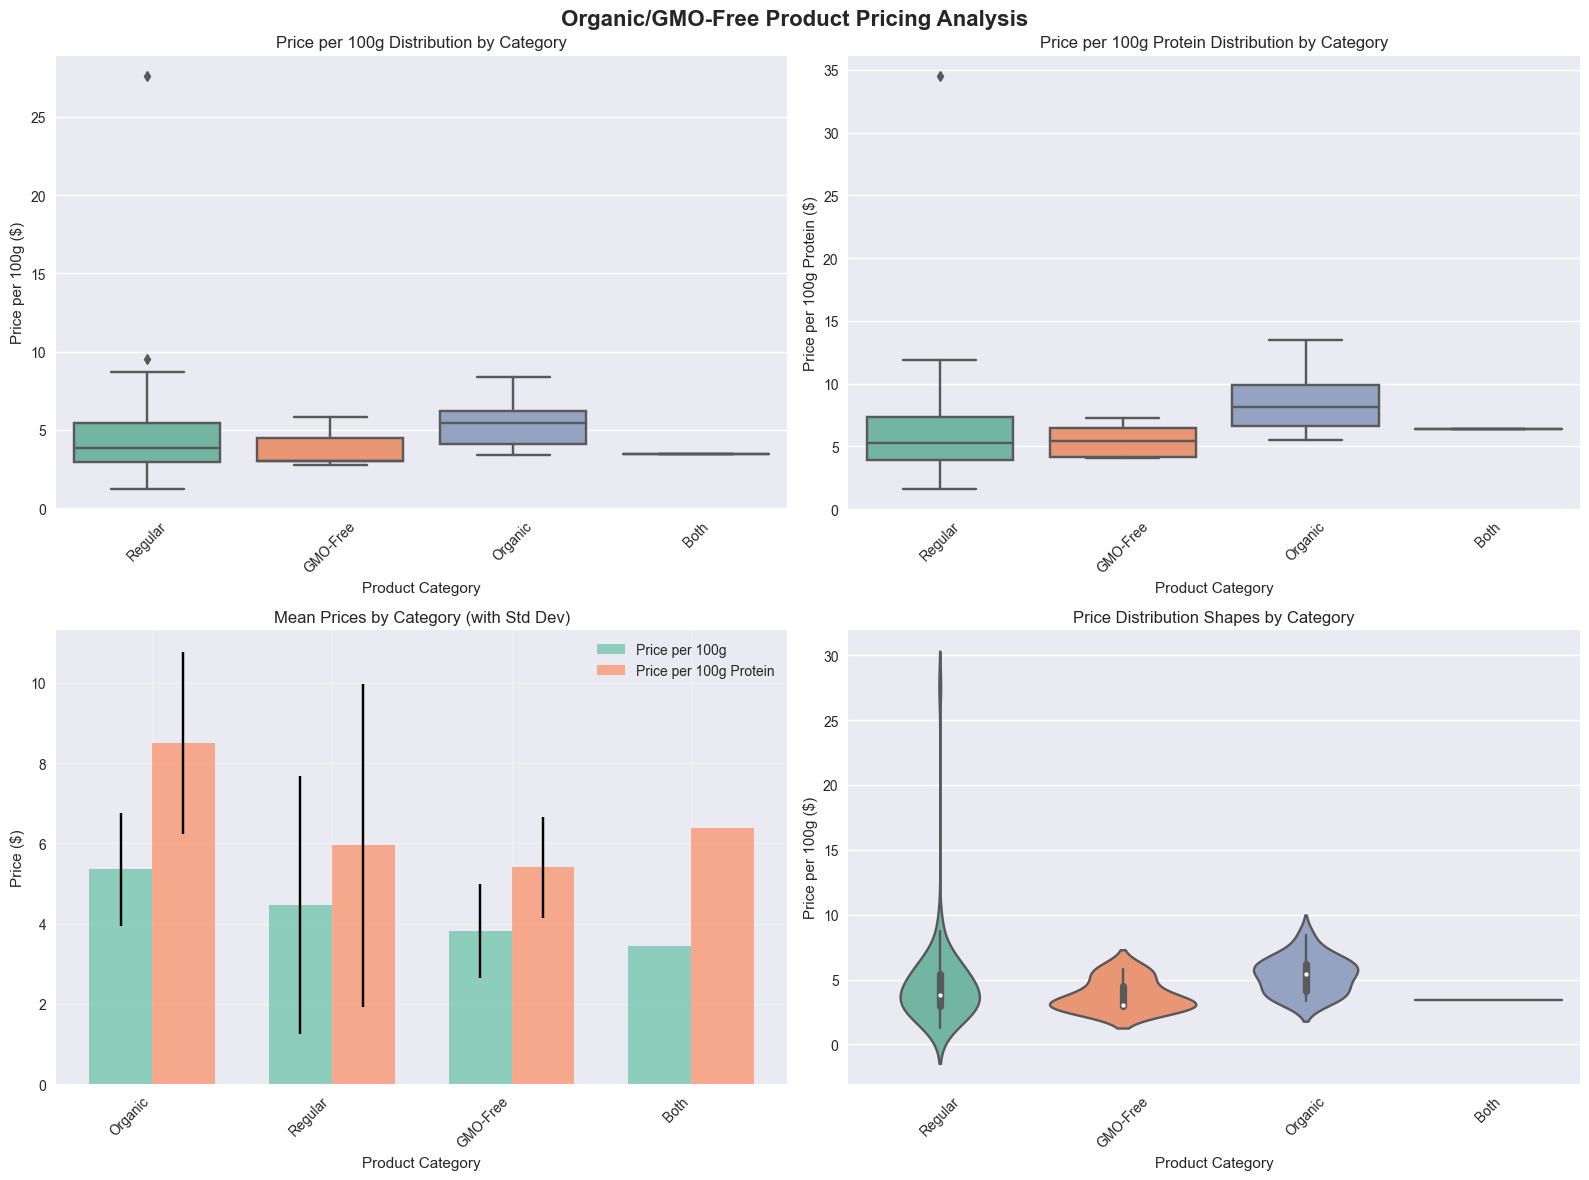


3. KEY INSIGHTS
Most expensive category (avg): Organic ($5.36/100g)
Cheapest category (avg): Both ($3.45/100g)
Category with most products: Regular (75 products)

** PRICE COMPARISON ANALYSIS (vs Regular products) **
Note: Interpret with caution due to significant sample size differences
• Organic: +20.2% higher ($+0.90/100g) - 18 vs 75 products
• GMO-Free: 14.3% lower ($-0.64/100g) - 9 vs 75 products (⚠️ Small sample - interpret cautiously)
• Both: 22.6% lower ($-1.01/100g) - 1 vs 75 products (⚠️ Very limited data - not reliable for conclusions)

** IMPORTANT INTERPRETATION NOTES **
• GMO-Free and 'Both' categories appear cheaper, but this is likely due to:
  - Extremely small sample sizes (≤10 products each)
  - Potential selection bias in available products
  - Different brand/market positioning in this specific dataset
• These results do NOT reflect general market trends for organic/GMO-free products
• Only the Organic category has sufficient sample size for meaningful comparison


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn')
sns.set_palette("Set2")

# Load the data
df = pd.read_csv('../data/protein_data_enhanced.csv')

print("=== ORGANIC/GMO-FREE PRODUCT PRICING ANALYSIS ===\n")
print(f"Dataset shape: {df.shape}")
print(f"Unique categories: {df['category'].unique()}")
print(f"Category distribution:\n{df['category'].value_counts()}")

# 1. CATEGORY STATISTICS
print("\n" + "="*50)
print("1. PRICING STATISTICS BY CATEGORY")
print("="*50)

# Calculate statistics for all categories
category_prices = df.groupby('category').agg({
    'price_per_100g': ['mean', 'median', 'std', 'count'],
    'price_per_100g_protein': ['mean', 'median', 'std', 'count']
}).round(2)

# Sort by average price per 100g for better readability
category_prices_sorted = category_prices.sort_values(('price_per_100g', 'mean'), ascending=False)

print("All categories sorted by mean price per 100g (highest to lowest):")
print(category_prices_sorted)

# 2. VISUALIZATION
print("\n" + "="*30)
print("2. VISUALIZATION")
print("="*30)

# Create comprehensive visualization with multiple plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Organic/GMO-Free Product Pricing Analysis', fontsize=16, fontweight='bold')

# Plot 1: Box plot for price per 100g by category
axes[0, 0].set_title('Price per 100g Distribution by Category')
sns.boxplot(data=df, x='category', y='price_per_100g', ax=axes[0, 0])
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Price per 100g ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Box plot for price per 100g protein by category
axes[0, 1].set_title('Price per 100g Protein Distribution by Category')
sns.boxplot(data=df, x='category', y='price_per_100g_protein', ax=axes[0, 1])
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Price per 100g Protein ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Mean comparison with error bars
means_100g = category_prices_sorted[('price_per_100g', 'mean')]
stds_100g = category_prices_sorted[('price_per_100g', 'std')]
means_protein = category_prices_sorted[('price_per_100g_protein', 'mean')]
stds_protein = category_prices_sorted[('price_per_100g_protein', 'std')]

x_pos = np.arange(len(means_100g))
width = 0.35

bars1 = axes[1, 0].bar(x_pos - width/2, means_100g, width, yerr=stds_100g, 
                       label='Price per 100g', alpha=0.7, capsize=5)
bars2 = axes[1, 0].bar(x_pos + width/2, means_protein, width, yerr=stds_protein,
                       label='Price per 100g Protein', alpha=0.7, capsize=5)

axes[1, 0].set_xlabel('Product Category')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Mean Prices by Category (with Std Dev)')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(means_100g.index, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Violin plot showing distribution shapes
axes[1, 1].set_title('Price Distribution Shapes by Category')
sns.violinplot(data=df, x='category', y='price_per_100g', ax=axes[1, 1])
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Price per 100g ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. KEY INSIGHTS
print("\n" + "="*30)
print("3. KEY INSIGHTS")
print("="*30)

# Calculate key statistics
most_expensive_cat = category_prices_sorted.index[0]
cheapest_cat = category_prices_sorted.index[-1]
largest_sample = category_prices_sorted.sort_values(('price_per_100g', 'count'), ascending=False).index[0]

print(f"Most expensive category (avg): {most_expensive_cat} (${means_100g.loc[most_expensive_cat]:.2f}/100g)")
print(f"Cheapest category (avg): {cheapest_cat} (${means_100g.loc[cheapest_cat]:.2f}/100g)")
print(f"Category with most products: {largest_sample} ({category_prices_sorted.loc[largest_sample, ('price_per_100g', 'count')]} products)")

# Price comparison analysis with sample size context
regular_price = means_100g.loc['Regular']
price_differences = {}
for cat in means_100g.index:
    if cat != 'Regular':
        diff_pct = ((means_100g.loc[cat] - regular_price) / regular_price) * 100
        price_differences[cat] = diff_pct

print(f"\n** PRICE COMPARISON ANALYSIS (vs Regular products) **")
print(f"Note: Interpret with caution due to significant sample size differences")
for cat, diff_pct in price_differences.items():
    count = sample_sizes.loc[cat]
    regular_count = sample_sizes.loc['Regular']
    
    if diff_pct > 0:
        direction = f"{diff_pct:+.1f}% higher"
    else:
        direction = f"{abs(diff_pct):.1f}% lower"
    
    reliability_note = ""
    if count <= 5:
        reliability_note = " (⚠️ Very limited data - not reliable for conclusions)"
    elif count <= 15:
        reliability_note = " (⚠️ Small sample - interpret cautiously)"
    
    print(f"• {cat}: {direction} (${means_100g.loc[cat] - regular_price:+.2f}/100g) - {count} vs {regular_count} products{reliability_note}")

print(f"\n** IMPORTANT INTERPRETATION NOTES **")
print(f"• GMO-Free and 'Both' categories appear cheaper, but this is likely due to:")
print(f"  - Extremely small sample sizes (≤10 products each)")
print(f"  - Potential selection bias in available products")
print(f"  - Different brand/market positioning in this specific dataset")
print(f"• These results do NOT reflect general market trends for organic/GMO-free products")
print(f"• Only the Organic category has sufficient sample size for meaningful comparison")

# Sample size analysis and caveats
sample_sizes = category_prices_sorted[('price_per_100g', 'count')]
total_products = sample_sizes.sum()

print(f"\n** ANALYSIS CAVEAT - Sample Size Impact **")
for cat in sample_sizes.index:
    count = sample_sizes.loc[cat]
    percentage = (count / total_products) * 100
    reliability = "⚠️  Very small sample" if count <= 5 else "⚠️  Small sample" if count <= 15 else "✓ Adequate sample"
    print(f"• {cat}: {count} products ({percentage:.1f}% of dataset) {reliability}")

print(f"• Categories with small samples have limited statistical reliability")
print(f"• Price premiums should be interpreted cautiously for small sample categories")

# Statistical significance note
print(f"\n** STATISTICAL CONSIDERATIONS **")
print(f"• Large difference in sample sizes makes direct comparisons challenging")
print(f"• Regular products dominate the dataset ({sample_sizes.loc['Regular']} products)")
print(f"• Specialty categories may represent niche/premium market segments")

# Value analysis
print(f"\n** VALUE INSIGHTS **")
protein_efficiency = means_protein / means_100g
best_protein_value = protein_efficiency.idxmin()
worst_protein_value = protein_efficiency.idxmax()

print(f"• Best protein value category: {best_protein_value}")
print(f"• Worst protein value category: {worst_protein_value}")
print(f"• Average price premium for organic/specialty: {np.mean([p for p in price_premiums.values() if p > 0]):.1f}%")

print(f"\nOverall dataset averages:")
print(f"  Price per 100g: ${df['price_per_100g'].mean():.2f}")
print(f"  Price per 100g protein: ${df['price_per_100g_protein'].mean():.2f}")

# Next Steps

## Protein Type Pricing